In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#from statsmodels.stats.proportion import proportion_confint
#import pylab
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
data_1 = pd.read_csv('hcmv-263hxkx-1qhtfgz.txt')

In [31]:
# from original data set, n = 296 (Palindromes), N = 229354 (Base pairs)
n, N = 296, 229354

In [32]:
# Generate three uniformed distributed 
samples = [pd.Series(np.random.uniform(0,N,n)).sort_values() for i in range(3)]

# Random Scatter

Text(0.5, 1.0, 'Location of Palindromes')

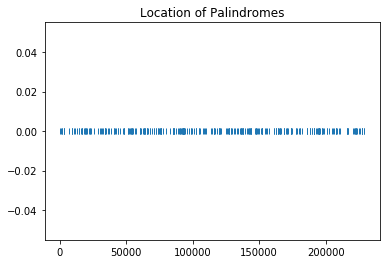

In [33]:
#'Location of Palindromes'
plt.plot(data_1.location, np.zeros_like(data_1.location) + 0, '|')
plt.title('Location of Palindromes')

Text(0.5, 1.0, 'similated data 1')

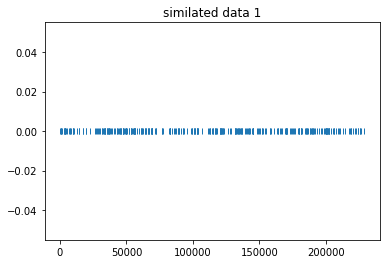

In [34]:
# Location of three simulated samples
#for i in samples:
plt.plot(samples[0], np.zeros_like(samples[0]) + 0, '|')
plt.title('similated data 1')

Text(0.5, 1.0, 'similated data 2')

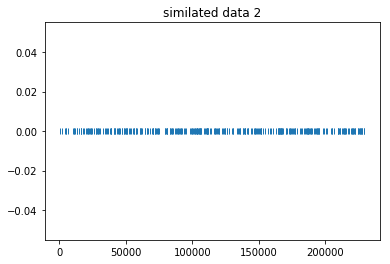

In [35]:
plt.plot(samples[1], np.zeros_like(samples[1]) + 0, '|')
plt.title('similated data 2')

Text(0.5, 1.0, 'similated data 3')

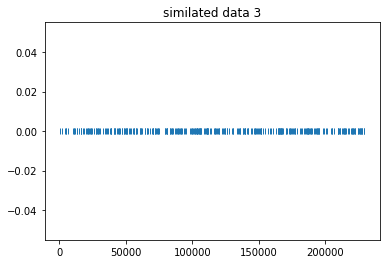

In [36]:
plt.plot(samples[1], np.zeros_like(samples[2]) + 0, '|')
plt.title('similated data 3')

Text(0.5, 0, 'Base Pair')

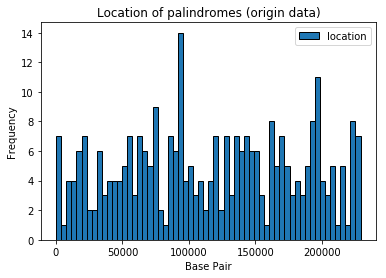

In [37]:
data_1.plot(kind="hist", bins = 60, edgecolor = 'k',title='Location of palindromes (origin data)')
plt.xlabel("Base Pair")


Text(0.5, 0, 'Base Pair')

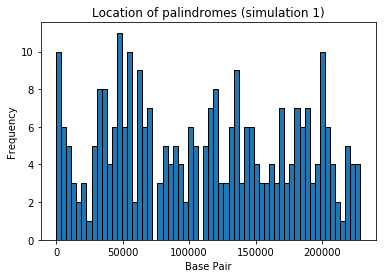

In [38]:
pd.Series(samples[0]).sort_values().reset_index()[0].plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 1)'))
plt.xlabel("Base Pair")

Text(0.5, 0, 'Base Pair')

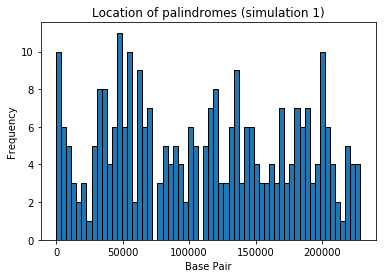

In [39]:
pd.Series(samples[0]).plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 1)'))
plt.xlabel("Base Pair")

Text(0.5, 0, 'Base Pair')

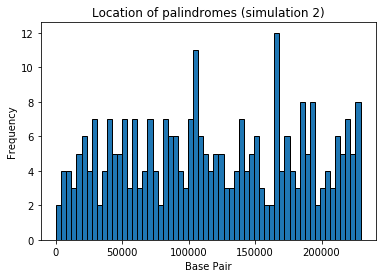

In [40]:
pd.Series(samples[1]).plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 2)'))
plt.xlabel("Base Pair")

Text(0.5, 0, 'Base Pair')

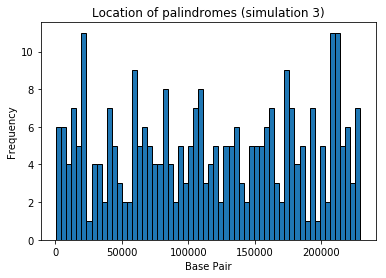

In [41]:
pd.Series(samples[2]).plot(kind= 'hist', bins = 60, edgecolor = 'k',title = ('Location of palindromes (simulation 3)'))
plt.xlabel("Base Pair")

In [42]:
data_1 = data_1.assign(distance_from_previouse_palindrome\
                       = data_1.location.diff().set_value(0, np.NaN))

/Users/yangbolin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'distance_from_previouse_palindrome')

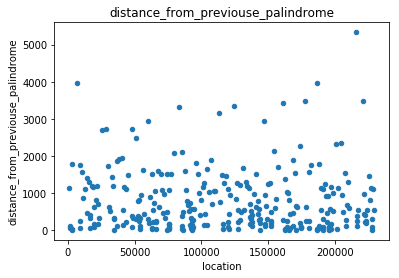

In [43]:
data_1.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')
plt.title('distance_from_previouse_palindrome')

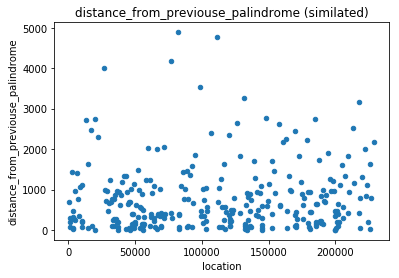

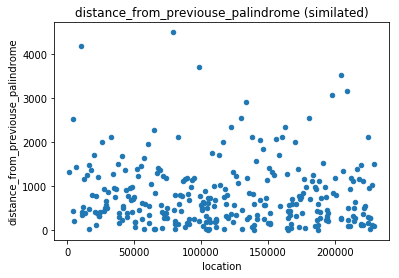

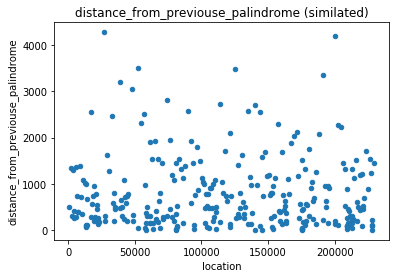

In [44]:
df_lst = []
for i in samples:
    df_lst += [
        pd.DataFrame(
                {
                    'location' : i[1:]
                }
        ).assign(distance_from_previouse_palindrome = i.diff().iloc[1:])\
    ]
for i in df_lst:
    i.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')
    plt.title('distance_from_previouse_palindrome (similated)')

Text(0, 0.5, 'Frequency')

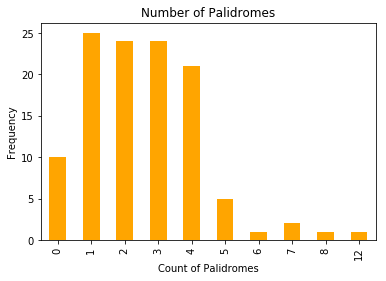

In [50]:
original = pd.cut(data_1.location, range(0, N+1, 2000)).value_counts()\
.rename('count').to_frame().groupby('count')['count'].count()
original.plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

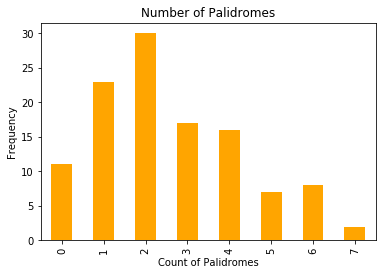

In [51]:
pd.cut(samples[0], range(0, N+1, 2000)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count().plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

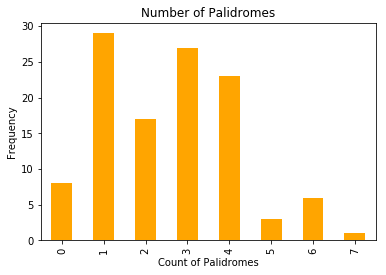

In [52]:
pd.cut(samples[1], range(0, N+1, 2000)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count().plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

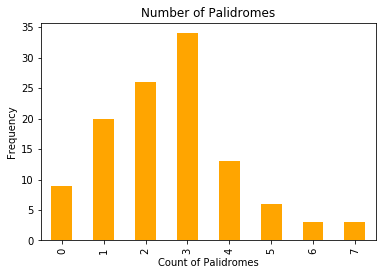

In [53]:
pd.cut(samples[2], range(0, N+1, 2000)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count().plot(kind = 'bar', title="Number of Palidromes", color = 'orange')
plt.xlabel("Count of Palidromes")
plt.ylabel("Frequency")

# Location and Spacing

In [21]:
# interval 4000

In [22]:
spacing = data_1.location.diff()
spacing_1 = pd.Series(samples[0]).diff()
spacing_2 = pd.Series(samples[1]).diff()
spacing_3 = pd.Series(samples[2]).diff()

Text(0.5, 1.0, 'spacing histogram of original data set')

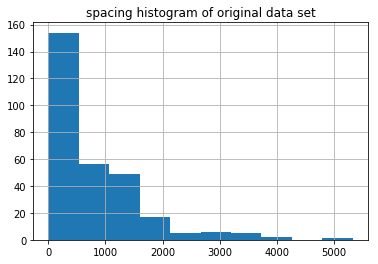

In [23]:
spacing.hist()
plt.title('spacing histogram of original data set')

Text(0.5, 1.0, 'spacing histogram of simulated 1 set')

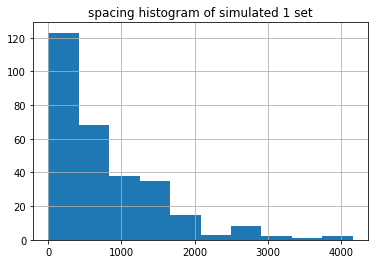

In [24]:
spacing_1.hist()
plt.title('spacing histogram of simulated 1 set')

Text(0.5, 1.0, 'spacing histogram of simulated 2 set')

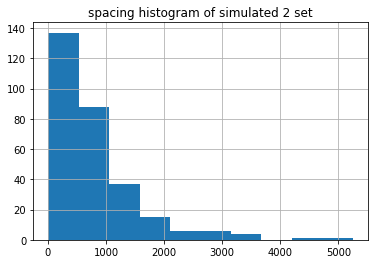

In [25]:
spacing_2.hist()
plt.title('spacing histogram of simulated 2 set')

Text(0.5, 1.0, 'spacing histogram of simulated 3 set')

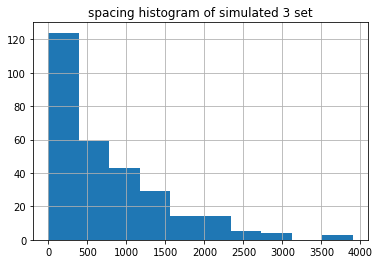

In [26]:
spacing_3.hist()
plt.title('spacing histogram of simulated 3 set')

In [27]:
# Sum of two consecutive pairs, and spacing. 

In [28]:
diff_pair_table = pd.DataFrame(
    {'spacing of original data distance two pairs':data_1.location.iloc[range(0,len(data_1),2)].diff().reset_index(drop = True),
     'spacing of sample_1 data distance two pairs': samples[0].iloc[range(0,len(samples[0]),2)].diff().reset_index(drop = True),
     'spacing of sample_2 data distance two pairs': samples[1].iloc[range(0,len(samples[1]),2)].diff().reset_index(drop = True),
     'spacing of sample_3 data distance two pairs': samples[2].iloc[range(0,len(samples[2]),2)].diff().reset_index(drop = True)
    })

In [29]:
diff_pair_table.head()

,spacing of original data distance two pairs,spacing of sample_1 data distance two pairs,spacing of sample_2 data distance two pairs,spacing of sample_3 data distance two pairs
0,NaN,NaN,NaN,NaN
1,1256.0,1227.496198,830.641347,474.808457
2,1815.0,973.346697,698.765133,1404.563938
3,38.0,813.206746,1081.595552,1092.925760
4,5737.0,2725.594563,863.679489,407.448214


In [30]:
diff_pair_table.columns[0]

'spacing of original data distance two pairs'

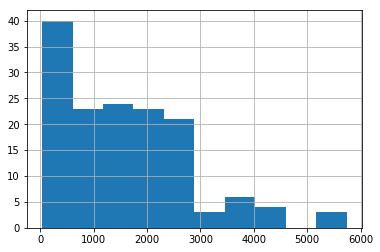

In [31]:
diff_pair_table.dropna().iloc[:,0].hist()
plt.title = (diff_pair_table.columns[0])

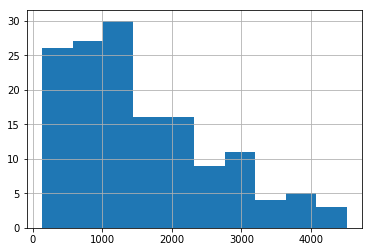

In [32]:
diff_pair_table.dropna().iloc[:,1].hist()
plt.title = (diff_pair_table.columns[1])

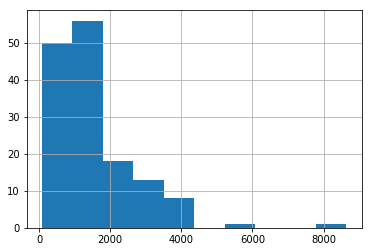

In [33]:
diff_pair_table.dropna().iloc[:,2].hist()
plt.title = (diff_pair_table.columns[2])

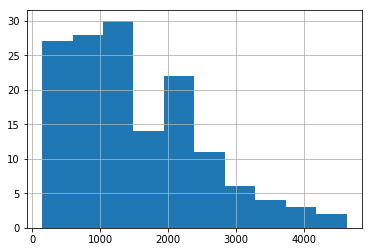

In [34]:
diff_pair_table.dropna().iloc[:,3].hist()
plt.title = (diff_pair_table.columns[3])

In [35]:
stats.chisquare(diff_pair_table.iloc[:,0].dropna(), diff_pair_table.iloc[:,1].dropna())

Power_divergenceResult(statistic=559498.7408128604, pvalue=0.0)

# Counts

In [123]:
sample = samples[0] #pick our first random sample as our sample

In [125]:
for i in range(2000, 5001, 1000):
    pd.cut(data_1.location, range(0, N+1, i)).value_counts().to_frame().head(10)

In [126]:
idx = [j for i in list(zip(['orginial_data interval = {}'.format(i) for i in range(2000, 5001, 1000)],\
    ['simulated_data interval = {}'.format(i) for i in range(2000, 5001, 1000)])) for j in i]
    
    

In [127]:
output = pd.DataFrame(index = idx, columns = range(1, 21))

In [128]:
for i in range(2000, 5001, 1000):
    original = pd.cut(data_1.location, range(0, N+1, i)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count()
    simulated = pd.cut(sample, range(0, N+1, i)).value_counts().rename('count')\
    .to_frame().groupby('count')['count'].count()
    for j in original.index:
        output.loc['orginial_data interval = {}'.format(i),j] = original.loc[j]
    for j in simulated.index:
        output.loc['simulated_data interval = {}'.format(i),j] = simulated.loc[j]

In [129]:
output = output.drop(0, axis = 1).fillna(0)

In [130]:
output

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
orginial_data interval = 2000,25,24,24,21,5,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0
simulated_data interval = 2000,27,25,26,17,9,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
orginial_data interval = 3000,11,8,18,11,11,10,1,3,0,1,0,0,1,0,0,0,0,0,0,0
simulated_data interval = 3000,4,13,18,19,11,4,4,1,1,1,0,0,0,0,0,0,0,0,0,0
orginial_data interval = 4000,5,2,8,10,9,8,5,4,4,0,1,0,0,1,0,0,0,0,0,0
simulated_data interval = 4000,0,3,9,10,15,7,7,2,1,3,0,0,0,0,0,0,0,0,0,0
orginial_data interval = 5000,2,1,5,6,4,4,5,9,5,2,0,1,0,0,0,0,0,1,0,0
simulated_data interval = 5000,0,0,4,5,15,2,6,6,2,1,2,1,1,0,0,0,0,0,0,0


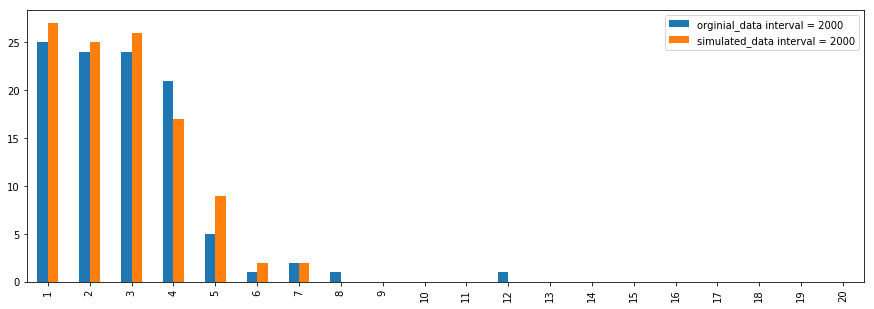

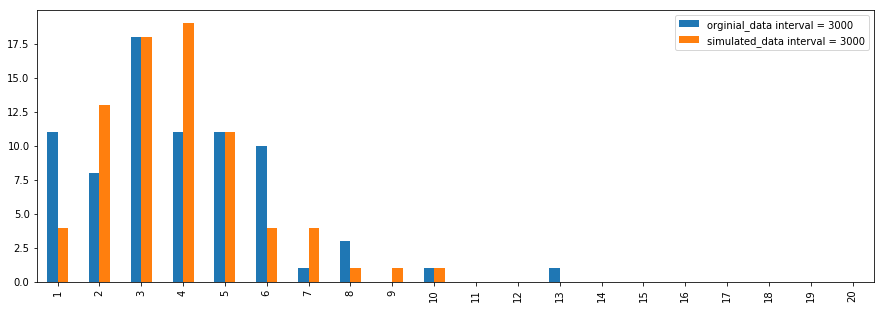

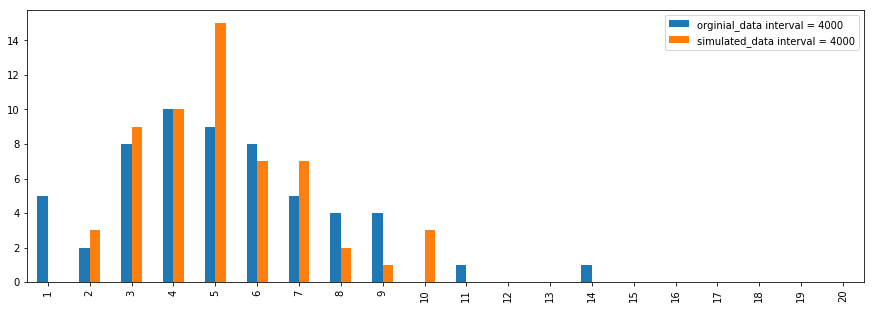

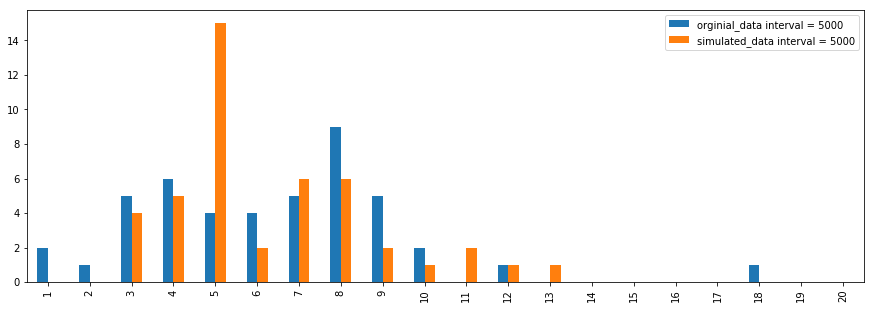

In [131]:
for i in range(0,len(output),2):
#     fig = plt.figure() # Create matplotlib figure
#     ax = fig.add_subplot(111) # Create matplotlib axes
#     ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#     width = 0.4
    
    
    
    t1 = output.iloc[i:i+2]
    #t2 = output.iloc[i+1]
    t1.T.plot(kind='bar', figsize=(15,5))
    #t2.plot(kind='bar', figsize=(15,5))
    plt.show()

In [133]:
#Performing chi-square test for count
from scipy.stats import chisquare

In [142]:
obs = output.iloc[0:11:2]
exp = output.iloc[1:11:2]

In [175]:
# We choosing the first 0 - 8 counts to roughly enlimulate outliers, making the chi-suqure test not too greedy

In [186]:
for i in range(len(obs)):
    print('with interval = {}, performing chi-square test, p-val is: '.format((i+1)*1000 + 1000))
    print(chisquare(obs.iloc[i,:8], exp.iloc[i,:8])[1])

with interval = 2000, performing chi-square test, p-val is: 
0.0
with interval = 3000, performing chi-square test, p-val is: 
2.8952137131515253e-05
with interval = 4000, performing chi-square test, p-val is: 
0.0
with interval = 5000, performing chi-square test, p-val is: 
0.0


In [187]:
# P-Val is very small

In [188]:
# ploting standardlize residuals

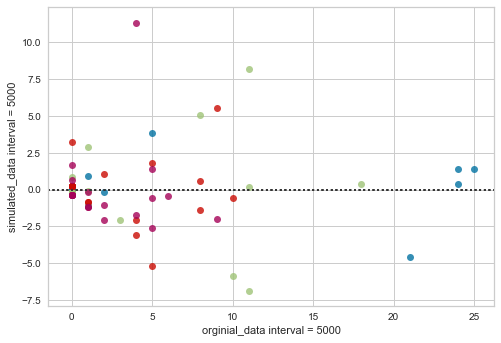

In [199]:
import seaborn as sns
for i in range(len(obs)):
    sns.residplot(obs.iloc[i], exp.iloc[i])


# The Biggest Cluster

In [238]:
#bins
bins = [40, 60, 80, 100, 120]

In [239]:
out = pd.DataFrame(index = bins, columns = ['lambda', 'interval_width', 'probability', 'maximum', 'prediction_interval'])
for i in bins:
    interval = N//i
    k = pd.cut(data_1.location, range(0, N+1, interval)).value_counts().rename('count').max()
    x_bar = pd.cut(data_1.location, range(0, N+1, interval)).value_counts().rename('count').mean()
    pred = pd.cut(data_1.location, range(0, N+1, interval)).value_counts().rename('count').idxmax()
    P = (x_bar**(k)/ np.math.factorial((k))) * np.exp(-x_bar)
    out.loc[i] = x_bar, interval, P, k, pred

In [240]:
out

,lambda,interval_width,probability,maximum,prediction_interval
40,7.4,5733,0.00510737,15,"(91728, 97461]"
60,4.93333,3822,0.000417868,14,"(91728, 95550]"
80,3.7,2866,2.5558e-05,14,"(91712, 94578]"
100,2.96,2293,1.1143e-05,13,"(91720, 94013]"
120,2.46667,1911,1.70567e-06,13,"(91728, 93639]"


# Advance, how would you advice biologist?

In [263]:
# using machine learning algorithm to create our model, and validate with the random samples
# from 